# Predicting Learning Curves of Convolutional Neural Network on CIFAR10

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import numpy as np
import tools as t
import models as m
import hyperband as hp

Using TensorFlow backend.


In [2]:
configs,lcs,Y = t.load_data(scale_configs = True)
print("lcs:", lcs.shape, "configs:", configs.shape, "Y", Y.shape)

scaling configuration data
lcs: (265, 40, 1) configs: (265, 5) Y (265, 1)


###    Testing models (mlp, lstm, multi_lstm)

In [4]:
cfg = {'lr': 0.2213474827989724, 'batch_size': 20, 'k_exp': 0.005043479631870928}
model = m.mlp(cfg['lr'])
m.train_mlp(model, configs, Y, cfg, split=177, epochs=500)
mse = m.eval_mlp(model, configs, Y, split=177, batch_size=20)

Train on 177 samples, validate on 88 samples
Epoch 1/200
177/177 [==============================] - 0s 1ms/step - loss: 0.0570 - val_loss: 0.0263
Epoch 2/200
177/177 [==============================] - 0s 183us/step - loss: 0.0388 - val_loss: 0.0259
Epoch 3/200
177/177 [==============================] - 0s 296us/step - loss: 0.0384 - val_loss: 0.0260
Epoch 4/200
177/177 [==============================] - 0s 294us/step - loss: 0.0393 - val_loss: 0.0290
Epoch 5/200
177/177 [==============================] - 0s 289us/step - loss: 0.0373 - val_loss: 0.0248
Epoch 6/200
177/177 [==============================] - 0s 308us/step - loss: 0.0357 - val_loss: 0.0245
Epoch 7/200
177/177 [==============================] - 0s 407us/step - loss: 0.0359 - val_loss: 0.0267
Epoch 8/200
177/177 [==============================] - 0s 341us/step - loss: 0.0342 - val_loss: 0.0237
Epoch 9/200
177/177 [==============================] - 0s 389us/step - loss: 0.0344 - val_loss: 0.0235
Epoch 10/200
177/177 [========

Epoch 157/200
177/177 [==============================] - 0s 419us/step - loss: 0.0038 - val_loss: 0.0068
Epoch 158/200
177/177 [==============================] - 0s 269us/step - loss: 0.0032 - val_loss: 0.0070
Epoch 159/200
177/177 [==============================] - 0s 428us/step - loss: 0.0033 - val_loss: 0.0092
Epoch 160/200
177/177 [==============================] - 0s 288us/step - loss: 0.0042 - val_loss: 0.0078
Epoch 161/200
177/177 [==============================] - 0s 348us/step - loss: 0.0036 - val_loss: 0.0068
Epoch 162/200
177/177 [==============================] - 0s 241us/step - loss: 0.0038 - val_loss: 0.0071
Epoch 163/200
177/177 [==============================] - 0s 394us/step - loss: 0.0032 - val_loss: 0.0078
Epoch 164/200
177/177 [==============================] - 0s 249us/step - loss: 0.0031 - val_loss: 0.0066
Epoch 165/200
177/177 [==============================] - 0s 356us/step - loss: 0.0030 - val_loss: 0.0065
Epoch 166/200
177/177 [==============================] 

In [6]:
model = m.lstm()
print("lcs:", lcs.shape, "configs:", configs.shape, "Y", Y.shape)
# m.train_lstm(model, lcs, steps=(5,5), split=200, batch_size=20, epochs=20, mode = 'nextstep')
m.train_lstm(model, lcs, steps=(0,5), split=200, batch_size=20, epochs=20, mode = 'nextstep')
mse = m.eval_lstm(model, lcs, steps=5, split=200, batch_size=20, mode = 'nextstep')

build lstm with input_dim: 1
lcs: (265, 40, 1) configs: (265, 5) Y (265, 1)
train with random nr. of epochs, evaluate with 5 epochs
Epoch 1/2
10/10 [==============================] - 3s 304ms/step - loss: 0.0598 - mean_squared_error: 0.0598 - val_loss: 0.0183 - val_mean_squared_error: 0.0183
Epoch 2/2
10/10 [==============================] - 2s 170ms/step - loss: 0.0122 - mean_squared_error: 0.0122 - val_loss: 0.0174 - val_mean_squared_error: 0.0174
evaluate lstm without consideration of configs
65/65 [==============================] - 0s 779us/step
mse:  0.0173839222855


In [69]:
model = m.multi_lstm()
print("lcs:", lcs.shape, "configs:", configs.shape, "Y", Y.shape)
# m.train_lstm(model, [configs,lcs], steps=(0,5), split=200, batch_size=20, epochs=20, mode = 'finalstep')
m.train_lstm(model, [configs,lcs], steps=(20,20), split=150, batch_size=20, epochs=100, mode='nextstep')
mse = m.eval_lstm(model, [configs,lcs], steps=20, split=150, batch_size=20, mode='nextstep')

lcs: (265, 40, 1) configs: (265, 5) Y (265, 1)
train considering 20 epochs, evaluate with 20 epochs
Epoch 1/100
8/8 [==============================] - 4s 457ms/step - loss: 0.3766 - mean_squared_error: 0.3766 - val_loss: 0.4930 - val_mean_squared_error: 0.4930
Epoch 2/100
8/8 [==============================] - 1s 137ms/step - loss: 0.9218 - mean_squared_error: 0.9218 - val_loss: 0.2245 - val_mean_squared_error: 0.2245
Epoch 3/100
8/8 [==============================] - 1s 138ms/step - loss: 0.2141 - mean_squared_error: 0.2141 - val_loss: 0.1223 - val_mean_squared_error: 0.1223
Epoch 4/100
8/8 [==============================] - 1s 144ms/step - loss: 0.1177 - mean_squared_error: 0.1177 - val_loss: 0.0460 - val_mean_squared_error: 0.0460
Epoch 5/100
8/8 [==============================] - 1s 154ms/step - loss: 0.0292 - mean_squared_error: 0.0292 - val_loss: 0.0192 - val_mean_squared_error: 0.0192
Epoch 6/100
8/8 [==============================] - 1s 164ms/step - loss: 0.0199 - mean_squared_

8/8 [==============================] - 1s 69ms/step - loss: 3.8228e-04 - mean_squared_error: 3.8228e-04 - val_loss: 4.0450e-04 - val_mean_squared_error: 4.0450e-04
Epoch 94/100
8/8 [==============================] - 0s 60ms/step - loss: 3.3511e-04 - mean_squared_error: 3.3511e-04 - val_loss: 3.6290e-04 - val_mean_squared_error: 3.6290e-04
Epoch 95/100
8/8 [==============================] - 0s 61ms/step - loss: 2.9448e-04 - mean_squared_error: 2.9448e-04 - val_loss: 3.3539e-04 - val_mean_squared_error: 3.3539e-04
Epoch 96/100
8/8 [==============================] - 1s 70ms/step - loss: 2.6762e-04 - mean_squared_error: 2.6762e-04 - val_loss: 3.2115e-04 - val_mean_squared_error: 3.2115e-04
Epoch 97/100
8/8 [==============================] - 0s 61ms/step - loss: 2.5296e-04 - mean_squared_error: 2.5296e-04 - val_loss: 3.1496e-04 - val_mean_squared_error: 3.1496e-04
Epoch 98/100
8/8 [==============================] - 1s 67ms/step - loss: 2.4593e-04 - mean_squared_error: 2.4593e-04 - val_loss:

In [70]:
m.pred_finalpoints(model, [configs,lcs], steps=20, split=150, batch_size=20)

mse train: 0.00141, mse validation 0.00111


In [8]:
mse = m.eval_lstm(model, lcs, Y, steps=5, split=177, batch_size=20, mode = 'nextstep')

evaluate lstm without consideration of configs
88/88 [==============================] - 0s 482us/step
mse:  0.00275807289555


In [27]:
# model = m.multi_lstm(lr=0.002)
model = m.multi_lstm()
print("lcs:", lcs.shape, "configs:", configs.shape, "Y", Y.shape)
m.train_lstm(model, [configs,lcs], steps=(0,5), split=177, batch_size=20, epochs=50, mode = 'nextstep')
mse = m.eval_lstm(model, [configs,lcs], steps=5, split=177, batch_size=20, mode = 'nextstep')

lcs: (265, 40, 1) configs: (265, 5) Y (265, 1)
train with random nr. of epochs, evaluate with 5 epochs
Epoch 1/50
9/9 [==============================] - 7s 742ms/step - loss: 0.2620 - mean_squared_error: 0.2620 - val_loss: 0.0959 - val_mean_squared_error: 0.0959
Epoch 2/50
9/9 [==============================] - 2s 171ms/step - loss: 0.2231 - mean_squared_error: 0.2231 - val_loss: 0.1004 - val_mean_squared_error: 0.1004
Epoch 3/50
9/9 [==============================] - 2s 185ms/step - loss: 0.1406 - mean_squared_error: 0.1406 - val_loss: 0.1044 - val_mean_squared_error: 0.1044
Epoch 4/50
9/9 [==============================] - 2s 183ms/step - loss: 0.2207 - mean_squared_error: 0.2207 - val_loss: 0.0289 - val_mean_squared_error: 0.0289
Epoch 5/50
9/9 [==============================] - 2s 213ms/step - loss: 0.0489 - mean_squared_error: 0.0489 - val_loss: 0.0334 - val_mean_squared_error: 0.0334
Epoch 6/50
9/9 [==============================] - 2s 215ms/step - loss: 0.0149 - mean_squared_err

KeyboardInterrupt: 

In [10]:
model = m.multi_lstm(lr=0.002)
print("lcs:", lcs.shape, "configs:", configs.shape, "Y", Y.shape)
# now using random length for timesteps considered steps = (0,x)
m.train_lstm(model, [configs,lcs], steps=(0,5), split=177, batch_size=20, epochs=100, mode = 'nextstep')
mse = m.eval_lstm(model, [configs,lcs], steps=5, split=177, batch_size=20, mode = 'nextstep')

lcs: (265, 40, 1) configs: (265, 5) Y (265, 1)
train with random nr. of epochs, evaluate with 5 epochs
Epoch 1/100
9/9 [==============================] - 3s 304ms/step - loss: 0.1160 - mean_squared_error: 0.1160 - val_loss: 0.0853 - val_mean_squared_error: 0.0853
Epoch 2/100
9/9 [==============================] - 2s 183ms/step - loss: 0.0558 - mean_squared_error: 0.0558 - val_loss: 0.0434 - val_mean_squared_error: 0.0434
Epoch 3/100
9/9 [==============================] - 2s 188ms/step - loss: 0.0175 - mean_squared_error: 0.0175 - val_loss: 0.0174 - val_mean_squared_error: 0.0174
Epoch 4/100
9/9 [==============================] - 2s 179ms/step - loss: 0.0082 - mean_squared_error: 0.0082 - val_loss: 0.0137 - val_mean_squared_error: 0.0137
Epoch 5/100
9/9 [==============================] - 2s 187ms/step - loss: 0.0086 - mean_squared_error: 0.0086 - val_loss: 0.0108 - val_mean_squared_error: 0.0108
Epoch 6/100
9/9 [==============================] - 2s 250ms/step - loss: 0.0082 - mean_squar

Epoch 51/100
9/9 [==============================] - 2s 231ms/step - loss: 0.0017 - mean_squared_error: 0.0017 - val_loss: 0.0081 - val_mean_squared_error: 0.0081
Epoch 52/100
9/9 [==============================] - 2s 185ms/step - loss: 0.0021 - mean_squared_error: 0.0021 - val_loss: 0.0079 - val_mean_squared_error: 0.0079
Epoch 53/100
9/9 [==============================] - 2s 238ms/step - loss: 0.0033 - mean_squared_error: 0.0033 - val_loss: 0.0082 - val_mean_squared_error: 0.0082
Epoch 54/100
9/9 [==============================] - 2s 199ms/step - loss: 0.0051 - mean_squared_error: 0.0051 - val_loss: 0.0073 - val_mean_squared_error: 0.0073
Epoch 55/100
9/9 [==============================] - 2s 257ms/step - loss: 0.0086 - mean_squared_error: 0.0086 - val_loss: 0.0065 - val_mean_squared_error: 0.0065
Epoch 56/100
9/9 [==============================] - 3s 313ms/step - loss: 0.0056 - mean_squared_error: 0.0056 - val_loss: 0.0097 - val_mean_squared_error: 0.0097
Epoch 57/100
9/9 [==========

In [76]:
mse = m.eval_lstm(model, [configs,lcs], Y, steps=20, split=200, batch_size=20)

evaluate lstm with consideration of configs
65/65 [==============================] - 0s 2ms/step
mse:  0.000678403697048


###    evaluating models with cross validation (ridge, XGB, mlp, lstm, multi_lstm)

In [19]:
cfg={'alpha':1.0}
results = m.eval_cv('ridge', configs, Y, cfg=cfg, splits = 3)

cross validate 0 epochs, train on 5 steps, validate on [5] steps
config {'alpha': 1.0}
MSE on validation data on [5] steps: means over folds: *** 0.02977 ***
Results validation data of all Folds: 
[-0.03703 -0.02671 -0.02556]


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s finished
/home/jochen/Desktop/DL Theory/project/models.py:528: RuntimeWarning: Mean of empty slice.
  fit_params=fit_params)
/home/jochen/tensorflow/lib/python3.5/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [18]:
cfg = {'maxdepth': 10, 'lr': 0.08119864140758115, 'gamma': 0.007833441242813044, 'cols_bt': 0.9376450587145334, 
       'n_estimators': 1000, 'subsample': 0.7946631901813815}
#cfg = {'maxdepth': 4, 'lr': 0.07120217610550672, 'gamma': 0.03393596760993278, 'cols_bt': 0.823494199726015, 'n_estimators': 107, 'subsample': 0.7288741544938715}
results = m.eval_cv('xgb', configs, Y, cfg=cfg, splits = 3)

cross validate 0 epochs, train on 5 steps, validate on [5] steps
config {'maxdepth': 10, 'subsample': 0.7946631901813815, 'cols_bt': 0.9376450587145334, 'lr': 0.08119864140758115, 'gamma': 0.007833441242813044, 'n_estimators': 1000}
MSE on validation data on [5] steps: means over folds: *** 0.00691 ***
Results validation data of all Folds: 
[-0.00898 -0.00403 -0.00771]


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    1.9s finished
/home/jochen/Desktop/DL Theory/project/models.py:540: RuntimeWarning: Mean of empty slice.
  return results_train.mean(axis=0), results_val.mean(axis=0)
/home/jochen/tensorflow/lib/python3.5/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [17]:
# evaluate via cross validation
cfg = {'lr': 0.2213474827989724, 'batch_size': 20, 'k_exp': 0.005043479631870928} 
results = m.eval_cv('mlp', configs, Y, cfg=cfg, epochs=1000, splits = 3, earlystop=True, 
                    dropout=False, lr_exp_decay=False)

cross validate 1000 epochs, train on 5 steps, validate on [5] steps
config {'k_exp': 0.005043479631870928, 'lr': 0.2213474827989724, 'batch_size': 20}
choose min as mode
evaluating with early stopping

Epoch 00001: loss improved from inf to 0.04257, storing weights.

Epoch 00002: loss improved from 0.04257 to 0.02757, storing weights.

Epoch 00003: loss improved from 0.02757 to 0.02698, storing weights.

Epoch 00004: loss improved from 0.02698 to 0.02657, storing weights.

Epoch 00005: loss improved from 0.02657 to 0.02621, storing weights.

Epoch 00006: loss improved from 0.02621 to 0.02462, storing weights.

Epoch 00007: loss improved from 0.02462 to 0.02343, storing weights.

Epoch 00008: loss improved from 0.02343 to 0.02246, storing weights.

Epoch 00009: loss improved from 0.02246 to 0.02149, storing weights.

Epoch 00010: loss improved from 0.02149 to 0.02035, storing weights.

Epoch 00011: loss improved from 0.02035 to 0.01856, storing weights.

Epoch 00012: loss improved from 


Epoch 00151: loss is 0.00260, did not improve

Epoch 00152: loss is 0.00216, did not improve

Epoch 00153: loss is 0.00231, did not improve

Epoch 00154: loss is 0.00256, did not improve

Epoch 00155: loss is 0.00251, did not improve

Epoch 00156: loss improved from 0.00203 to 0.00200, storing weights.

Epoch 00157: loss is 0.00229, did not improve

Epoch 00158: loss is 0.00228, did not improve

Epoch 00159: loss is 0.00233, did not improve

Epoch 00160: loss improved from 0.00200 to 0.00175, storing weights.

Epoch 00161: loss is 0.00220, did not improve

Epoch 00162: loss is 0.00227, did not improve

Epoch 00163: loss is 0.00221, did not improve

Epoch 00164: loss is 0.00224, did not improve

Epoch 00165: loss is 0.00229, did not improve

Epoch 00166: loss is 0.00213, did not improve

Epoch 00167: loss improved from 0.00175 to 0.00172, storing weights.

Epoch 00168: loss is 0.00211, did not improve

Epoch 00169: loss is 0.00182, did not improve

Epoch 00170: loss is 0.00179, did not

Epoch 00309: loss is 0.00073, did not improve

Epoch 00310: loss is 0.00053, did not improve

Epoch 00311: loss is 0.00055, did not improve

Epoch 00312: loss improved from 0.00048 to 0.00045, storing weights.

Epoch 00313: loss is 0.00059, did not improve

Epoch 00314: loss is 0.00047, did not improve

Epoch 00315: loss is 0.00046, did not improve

Epoch 00316: loss is 0.00053, did not improve

Epoch 00317: loss is 0.00051, did not improve

Epoch 00318: loss is 0.00047, did not improve

Epoch 00319: loss is 0.00048, did not improve

Epoch 00320: loss improved from 0.00045 to 0.00042, storing weights.

Epoch 00321: loss is 0.00048, did not improve

Epoch 00322: loss is 0.00047, did not improve

Epoch 00323: loss is 0.00042, did not improve

Epoch 00324: loss is 0.00049, did not improve

Epoch 00325: loss is 0.00046, did not improve

Epoch 00326: loss is 0.00043, did not improve

Epoch 00327: loss is 0.00047, did not improve

Epoch 00328: loss is 0.00045, did not improve

Epoch 00329: l


Epoch 00472: loss is 0.00017, did not improve

Epoch 00473: loss is 0.00017, did not improve

Epoch 00474: loss is 0.00017, did not improve

Epoch 00475: loss improved from 0.00017 to 0.00016, storing weights.

Epoch 00476: loss improved from 0.00016 to 0.00015, storing weights.

Epoch 00477: loss is 0.00016, did not improve

Epoch 00478: loss is 0.00016, did not improve

Epoch 00479: loss is 0.00016, did not improve

Epoch 00480: loss is 0.00016, did not improve

Epoch 00481: loss improved from 0.00015 to 0.00015, storing weights.

Epoch 00482: loss is 0.00016, did not improve

Epoch 00483: loss is 0.00017, did not improve

Epoch 00484: loss is 0.00018, did not improve

Epoch 00485: loss is 0.00016, did not improve

Epoch 00486: loss is 0.00015, did not improve

Epoch 00487: loss is 0.00016, did not improve

Epoch 00488: loss is 0.00015, did not improve

Epoch 00489: loss improved from 0.00015 to 0.00014, storing weights.

Epoch 00490: loss is 0.00015, did not improve

Epoch 00491: l


Epoch 00120: loss is 0.00278, did not improve

Epoch 00121: loss is 0.00260, did not improve

Epoch 00122: loss improved from 0.00244 to 0.00235, storing weights.

Epoch 00123: loss is 0.00259, did not improve

Epoch 00124: loss is 0.00256, did not improve

Epoch 00125: loss is 0.00255, did not improve

Epoch 00126: loss is 0.00246, did not improve

Epoch 00127: loss is 0.00283, did not improve

Epoch 00128: loss is 0.00239, did not improve

Epoch 00129: loss improved from 0.00235 to 0.00230, storing weights.

Epoch 00130: loss is 0.00237, did not improve

Epoch 00131: loss is 0.00263, did not improve

Epoch 00132: loss improved from 0.00230 to 0.00229, storing weights.

Epoch 00133: loss is 0.00234, did not improve

Epoch 00134: loss is 0.00258, did not improve

Epoch 00135: loss is 0.00235, did not improve

Epoch 00136: loss is 0.00247, did not improve

Epoch 00137: loss is 0.00237, did not improve

Epoch 00138: loss improved from 0.00229 to 0.00225, storing weights.

Epoch 00139: l


Epoch 00286: loss is 0.00154, did not improve

Epoch 00287: loss is 0.00159, did not improve

Epoch 00288: loss is 0.00147, did not improve

Epoch 00289: loss is 0.00145, did not improve

Epoch 00290: loss is 0.00136, did not improve

Epoch 00291: loss is 0.00143, did not improve

Epoch 00292: loss is 0.00124, did not improve

Epoch 00293: loss is 0.00120, did not improve

Epoch 00294: loss is 0.00141, did not improve

Epoch 00295: loss is 0.00143, did not improve

Epoch 00296: loss is 0.00146, did not improve

Epoch 00297: loss is 0.00157, did not improve

Epoch 00298: loss is 0.00143, did not improve

Epoch 00299: loss is 0.00136, did not improve

Epoch 00300: loss is 0.00130, did not improve

Epoch 00301: loss is 0.00117, did not improve

Epoch 00302: loss is 0.00139, did not improve

Epoch 00303: loss is 0.00119, did not improve

Epoch 00304: loss is 0.00133, did not improve

Epoch 00305: loss is 0.00140, did not improve

Epoch 00306: loss is 0.00128, did not improve

Epoch 00307:


Epoch 00041: loss is 0.00609, did not improve

Epoch 00042: loss is 0.00581, did not improve

Epoch 00043: loss improved from 0.00540 to 0.00499, storing weights.

Epoch 00044: loss is 0.00546, did not improve

Epoch 00045: loss is 0.00510, did not improve

Epoch 00046: loss is 0.00532, did not improve

Epoch 00047: loss is 0.00518, did not improve

Epoch 00048: loss improved from 0.00499 to 0.00462, storing weights.

Epoch 00049: loss improved from 0.00462 to 0.00456, storing weights.

Epoch 00050: loss is 0.00475, did not improve

Epoch 00051: loss is 0.00490, did not improve

Epoch 00052: loss is 0.00515, did not improve

Epoch 00053: loss improved from 0.00456 to 0.00438, storing weights.

Epoch 00054: loss improved from 0.00438 to 0.00429, storing weights.

Epoch 00055: loss is 0.00452, did not improve

Epoch 00056: loss improved from 0.00429 to 0.00429, storing weights.

Epoch 00057: loss improved from 0.00429 to 0.00404, storing weights.

Epoch 00058: loss is 0.00429, did not i


Epoch 00197: loss is 0.00154, did not improve

Epoch 00198: loss is 0.00144, did not improve

Epoch 00199: loss is 0.00152, did not improve

Epoch 00200: loss improved from 0.00143 to 0.00138, storing weights.

Epoch 00201: loss is 0.00154, did not improve

Epoch 00202: loss is 0.00152, did not improve

Epoch 00203: loss is 0.00142, did not improve

Epoch 00204: loss is 0.00151, did not improve

Epoch 00205: loss is 0.00144, did not improve

Epoch 00206: loss is 0.00158, did not improve

Epoch 00207: loss is 0.00176, did not improve

Epoch 00208: loss is 0.00164, did not improve

Epoch 00209: loss improved from 0.00138 to 0.00136, storing weights.

Epoch 00210: loss is 0.00136, did not improve

Epoch 00211: loss improved from 0.00136 to 0.00128, storing weights.

Epoch 00212: loss is 0.00168, did not improve

Epoch 00213: loss is 0.00156, did not improve

Epoch 00214: loss improved from 0.00128 to 0.00126, storing weights.

Epoch 00215: loss is 0.00157, did not improve

Epoch 00216: l


Epoch 00365: loss is 0.00104, did not improve

Epoch 00366: loss is 0.00101, did not improve

Epoch 00367: loss is 0.00095, did not improve

Epoch 00368: loss is 0.00091, did not improve

Epoch 00369: loss is 0.00082, did not improve

Epoch 00370: loss improved from 0.00078 to 0.00073, storing weights.

Epoch 00371: loss is 0.00097, did not improve

Epoch 00372: loss is 0.00120, did not improve

Epoch 00373: loss is 0.00092, did not improve

Epoch 00374: loss is 0.00088, did not improve

Epoch 00375: loss is 0.00097, did not improve

Epoch 00376: loss improved from 0.00073 to 0.00072, storing weights.

Epoch 00377: loss is 0.00090, did not improve

Epoch 00378: loss is 0.00084, did not improve

Epoch 00379: loss is 0.00087, did not improve

Epoch 00380: loss is 0.00083, did not improve

Epoch 00381: loss is 0.00105, did not improve

Epoch 00382: loss is 0.00089, did not improve

Epoch 00383: loss is 0.00096, did not improve

Epoch 00384: loss is 0.00083, did not improve

Epoch 00385: 

[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  1.3min finished
/home/jochen/Desktop/DL Theory/project/models.py:540: RuntimeWarning: Mean of empty slice.
  return results_train.mean(axis=0), results_val.mean(axis=0)
/home/jochen/tensorflow/lib/python3.5/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [7]:
cfg = {'batch_size': 20}
results = m.eval_cv('lstm', lcs, Y, steps=(5,5), cfg=cfg, epochs=500, splits=3, earlystop=True)

cross validate 500 epochs, train on 5 steps, validate on 5 steps
config {'batch_size': 20}
evaluating with early stopping
build lstm with input_dim: 1
train considering 5 epochs, evaluate with 5 epochs
Epoch 1/500
9/9 [==============================] - 1s 156ms/step - loss: 0.0599 - mean_squared_error: 0.0599 - val_loss: 0.0329 - val_mean_squared_error: 0.0329
Epoch 2/500
9/9 [==============================] - 1s 60ms/step - loss: 0.0219 - mean_squared_error: 0.0219 - val_loss: 0.0347 - val_mean_squared_error: 0.0347
Epoch 3/500
9/9 [==============================] - 1s 64ms/step - loss: 0.0190 - mean_squared_error: 0.0190 - val_loss: 0.0243 - val_mean_squared_error: 0.0243
Epoch 4/500
9/9 [==============================] - 1s 61ms/step - loss: 0.0149 - mean_squared_error: 0.0149 - val_loss: 0.0212 - val_mean_squared_error: 0.0212
Epoch 5/500
9/9 [==============================] - 1s 62ms/step - loss: 0.0128 - mean_squared_error: 0.0128 - val_loss: 0.0179 - val_mean_squared_error: 0.01

Epoch 51/500
9/9 [==============================] - 1s 68ms/step - loss: 0.0034 - mean_squared_error: 0.0034 - val_loss: 0.0037 - val_mean_squared_error: 0.0037
Epoch 52/500
9/9 [==============================] - 1s 67ms/step - loss: 0.0030 - mean_squared_error: 0.0030 - val_loss: 0.0045 - val_mean_squared_error: 0.0045
Epoch 53/500
9/9 [==============================] - 1s 71ms/step - loss: 0.0031 - mean_squared_error: 0.0031 - val_loss: 0.0069 - val_mean_squared_error: 0.0069
Epoch 54/500
9/9 [==============================] - 1s 69ms/step - loss: 0.0037 - mean_squared_error: 0.0037 - val_loss: 0.0105 - val_mean_squared_error: 0.0105
Epoch 55/500
9/9 [==============================] - 1s 64ms/step - loss: 0.0046 - mean_squared_error: 0.0046 - val_loss: 0.0127 - val_mean_squared_error: 0.0127
Epoch 56/500
9/9 [==============================] - 1s 69ms/step - loss: 0.0054 - mean_squared_error: 0.0054 - val_loss: 0.0098 - val_mean_squared_error: 0.0098
Epoch 57/500
9/9 [================

Epoch 102/500
9/9 [==============================] - 1s 73ms/step - loss: 0.0023 - mean_squared_error: 0.0023 - val_loss: 0.0028 - val_mean_squared_error: 0.0028
Epoch 103/500
9/9 [==============================] - 1s 68ms/step - loss: 0.0023 - mean_squared_error: 0.0023 - val_loss: 0.0027 - val_mean_squared_error: 0.0027
Epoch 104/500
9/9 [==============================] - 1s 67ms/step - loss: 0.0022 - mean_squared_error: 0.0022 - val_loss: 0.0027 - val_mean_squared_error: 0.0027
Epoch 105/500
9/9 [==============================] - 1s 67ms/step - loss: 0.0022 - mean_squared_error: 0.0022 - val_loss: 0.0027 - val_mean_squared_error: 0.0027
Epoch 106/500
9/9 [==============================] - 1s 65ms/step - loss: 0.0022 - mean_squared_error: 0.0022 - val_loss: 0.0026 - val_mean_squared_error: 0.0026
Epoch 107/500
9/9 [==============================] - 1s 69ms/step - loss: 0.0022 - mean_squared_error: 0.0022 - val_loss: 0.0026 - val_mean_squared_error: 0.0026
Epoch 108/500
9/9 [=========

Epoch 203/500
9/9 [==============================] - 0s 19ms/step - loss: 0.0016 - mean_squared_error: 0.0016 - val_loss: 0.0018 - val_mean_squared_error: 0.0018
Epoch 204/500
9/9 [==============================] - 0s 18ms/step - loss: 0.0016 - mean_squared_error: 0.0016 - val_loss: 0.0018 - val_mean_squared_error: 0.0018
Epoch 205/500
9/9 [==============================] - 0s 54ms/step - loss: 0.0016 - mean_squared_error: 0.0016 - val_loss: 0.0018 - val_mean_squared_error: 0.0018
Epoch 206/500
9/9 [==============================] - 0s 32ms/step - loss: 0.0016 - mean_squared_error: 0.0016 - val_loss: 0.0018 - val_mean_squared_error: 0.0018
Epoch 207/500
9/9 [==============================] - 0s 22ms/step - loss: 0.0016 - mean_squared_error: 0.0016 - val_loss: 0.0018 - val_mean_squared_error: 0.0018
Epoch 208/500
9/9 [==============================] - 0s 19ms/step - loss: 0.0016 - mean_squared_error: 0.0016 - val_loss: 0.0018 - val_mean_squared_error: 0.0018
Epoch 209/500
9/9 [=========

9/9 [==============================] - 0s 27ms/step - loss: 0.0014 - mean_squared_error: 0.0014 - val_loss: 0.0017 - val_mean_squared_error: 0.0017
Epoch 304/500
9/9 [==============================] - 0s 26ms/step - loss: 0.0014 - mean_squared_error: 0.0014 - val_loss: 0.0017 - val_mean_squared_error: 0.0017
Epoch 305/500
9/9 [==============================] - 0s 26ms/step - loss: 0.0014 - mean_squared_error: 0.0014 - val_loss: 0.0017 - val_mean_squared_error: 0.0017
Epoch 306/500
9/9 [==============================] - 0s 19ms/step - loss: 0.0014 - mean_squared_error: 0.0014 - val_loss: 0.0017 - val_mean_squared_error: 0.0017
Epoch 307/500
9/9 [==============================] - 0s 20ms/step - loss: 0.0014 - mean_squared_error: 0.0014 - val_loss: 0.0017 - val_mean_squared_error: 0.0017
Epoch 308/500
9/9 [==============================] - 0s 25ms/step - loss: 0.0014 - mean_squared_error: 0.0014 - val_loss: 0.0017 - val_mean_squared_error: 0.0017
Epoch 309/500
9/9 [=======================

Epoch 354/500
9/9 [==============================] - 0s 19ms/step - loss: 0.0014 - mean_squared_error: 0.0014 - val_loss: 0.0016 - val_mean_squared_error: 0.0016
Epoch 355/500
9/9 [==============================] - 0s 28ms/step - loss: 0.0014 - mean_squared_error: 0.0014 - val_loss: 0.0016 - val_mean_squared_error: 0.0016
Epoch 356/500
9/9 [==============================] - 1s 59ms/step - loss: 0.0014 - mean_squared_error: 0.0014 - val_loss: 0.0016 - val_mean_squared_error: 0.0016
Epoch 357/500
9/9 [==============================] - 0s 19ms/step - loss: 0.0014 - mean_squared_error: 0.0014 - val_loss: 0.0016 - val_mean_squared_error: 0.0016
Epoch 358/500
9/9 [==============================] - 0s 51ms/step - loss: 0.0014 - mean_squared_error: 0.0014 - val_loss: 0.0016 - val_mean_squared_error: 0.0016
Epoch 359/500
9/9 [==============================] - 0s 52ms/step - loss: 0.0014 - mean_squared_error: 0.0014 - val_loss: 0.0016 - val_mean_squared_error: 0.0016
Epoch 360/500
9/9 [=========

9/9 [==============================] - 0s 19ms/step - loss: 0.0030 - mean_squared_error: 0.0030 - val_loss: 0.0023 - val_mean_squared_error: 0.0023
Epoch 38/500
9/9 [==============================] - 0s 29ms/step - loss: 0.0031 - mean_squared_error: 0.0031 - val_loss: 0.0026 - val_mean_squared_error: 0.0026
Epoch 39/500
9/9 [==============================] - 0s 23ms/step - loss: 0.0032 - mean_squared_error: 0.0032 - val_loss: 0.0028 - val_mean_squared_error: 0.0028
Epoch 40/500
9/9 [==============================] - 0s 25ms/step - loss: 0.0033 - mean_squared_error: 0.0033 - val_loss: 0.0028 - val_mean_squared_error: 0.0028
Epoch 41/500
9/9 [==============================] - 0s 19ms/step - loss: 0.0033 - mean_squared_error: 0.0033 - val_loss: 0.0024 - val_mean_squared_error: 0.0024
Epoch 42/500
9/9 [==============================] - 0s 18ms/step - loss: 0.0032 - mean_squared_error: 0.0032 - val_loss: 0.0020 - val_mean_squared_error: 0.0020
Epoch 43/500
9/9 [=============================

Epoch 88/500
9/9 [==============================] - 1s 63ms/step - loss: 0.0020 - mean_squared_error: 0.0020 - val_loss: 0.0016 - val_mean_squared_error: 0.0016
Epoch 89/500
9/9 [==============================] - 0s 20ms/step - loss: 0.0020 - mean_squared_error: 0.0020 - val_loss: 0.0016 - val_mean_squared_error: 0.0016
Epoch 90/500
9/9 [==============================] - 0s 28ms/step - loss: 0.0020 - mean_squared_error: 0.0020 - val_loss: 0.0016 - val_mean_squared_error: 0.0016
Epoch 91/500
9/9 [==============================] - 0s 38ms/step - loss: 0.0020 - mean_squared_error: 0.0020 - val_loss: 0.0016 - val_mean_squared_error: 0.0016
Epoch 92/500
9/9 [==============================] - 0s 43ms/step - loss: 0.0020 - mean_squared_error: 0.0020 - val_loss: 0.0016 - val_mean_squared_error: 0.0016
Epoch 93/500
9/9 [==============================] - 0s 19ms/step - loss: 0.0020 - mean_squared_error: 0.0020 - val_loss: 0.0016 - val_mean_squared_error: 0.0016
Epoch 94/500
9/9 [================

Epoch 139/500
9/9 [==============================] - 0s 33ms/step - loss: 0.0018 - mean_squared_error: 0.0018 - val_loss: 0.0014 - val_mean_squared_error: 0.0014
Epoch 140/500
9/9 [==============================] - 0s 38ms/step - loss: 0.0018 - mean_squared_error: 0.0018 - val_loss: 0.0013 - val_mean_squared_error: 0.0013
Epoch 141/500
9/9 [==============================] - 0s 31ms/step - loss: 0.0018 - mean_squared_error: 0.0018 - val_loss: 0.0013 - val_mean_squared_error: 0.0013
Epoch 142/500
9/9 [==============================] - 0s 27ms/step - loss: 0.0018 - mean_squared_error: 0.0018 - val_loss: 0.0013 - val_mean_squared_error: 0.0013
Epoch 143/500
9/9 [==============================] - 1s 73ms/step - loss: 0.0018 - mean_squared_error: 0.0018 - val_loss: 0.0013 - val_mean_squared_error: 0.0013
Epoch 144/500
9/9 [==============================] - 1s 74ms/step - loss: 0.0018 - mean_squared_error: 0.0018 - val_loss: 0.0013 - val_mean_squared_error: 0.0013
Epoch 145/500
9/9 [=========

Epoch 240/500
9/9 [==============================] - 1s 62ms/step - loss: 0.0016 - mean_squared_error: 0.0016 - val_loss: 0.0013 - val_mean_squared_error: 0.0013
Epoch 241/500
9/9 [==============================] - 1s 59ms/step - loss: 0.0016 - mean_squared_error: 0.0016 - val_loss: 0.0013 - val_mean_squared_error: 0.0013
Epoch 242/500
9/9 [==============================] - 1s 70ms/step - loss: 0.0016 - mean_squared_error: 0.0016 - val_loss: 0.0013 - val_mean_squared_error: 0.0013
Epoch 243/500
9/9 [==============================] - 1s 57ms/step - loss: 0.0016 - mean_squared_error: 0.0016 - val_loss: 0.0013 - val_mean_squared_error: 0.0013
Epoch 244/500
9/9 [==============================] - 1s 59ms/step - loss: 0.0016 - mean_squared_error: 0.0016 - val_loss: 0.0013 - val_mean_squared_error: 0.0013
Epoch 245/500
9/9 [==============================] - 1s 58ms/step - loss: 0.0016 - mean_squared_error: 0.0016 - val_loss: 0.0013 - val_mean_squared_error: 0.0013
Epoch 246/500
9/9 [=========

Epoch 341/500
9/9 [==============================] - 1s 63ms/step - loss: 0.0015 - mean_squared_error: 0.0015 - val_loss: 0.0012 - val_mean_squared_error: 0.0012
Epoch 342/500
9/9 [==============================] - 1s 61ms/step - loss: 0.0015 - mean_squared_error: 0.0015 - val_loss: 0.0012 - val_mean_squared_error: 0.0012
Epoch 343/500
9/9 [==============================] - 1s 65ms/step - loss: 0.0015 - mean_squared_error: 0.0015 - val_loss: 0.0012 - val_mean_squared_error: 0.0012
Epoch 344/500
9/9 [==============================] - 1s 65ms/step - loss: 0.0015 - mean_squared_error: 0.0015 - val_loss: 0.0012 - val_mean_squared_error: 0.0012
Epoch 345/500
9/9 [==============================] - 1s 70ms/step - loss: 0.0015 - mean_squared_error: 0.0015 - val_loss: 0.0012 - val_mean_squared_error: 0.0012
Epoch 346/500
9/9 [==============================] - 1s 68ms/step - loss: 0.0015 - mean_squared_error: 0.0015 - val_loss: 0.0012 - val_mean_squared_error: 0.0012
Epoch 347/500
9/9 [=========

Epoch 442/500
9/9 [==============================] - 1s 64ms/step - loss: 0.0014 - mean_squared_error: 0.0014 - val_loss: 0.0012 - val_mean_squared_error: 0.0012
Epoch 443/500
9/9 [==============================] - 1s 62ms/step - loss: 0.0014 - mean_squared_error: 0.0014 - val_loss: 0.0012 - val_mean_squared_error: 0.0012
Epoch 444/500
9/9 [==============================] - 1s 57ms/step - loss: 0.0014 - mean_squared_error: 0.0014 - val_loss: 0.0012 - val_mean_squared_error: 0.0012
Epoch 445/500
9/9 [==============================] - 1s 63ms/step - loss: 0.0014 - mean_squared_error: 0.0014 - val_loss: 0.0012 - val_mean_squared_error: 0.0012
Epoch 446/500
9/9 [==============================] - 1s 60ms/step - loss: 0.0014 - mean_squared_error: 0.0014 - val_loss: 0.0012 - val_mean_squared_error: 0.0012
Epoch 447/500
9/9 [==============================] - 1s 56ms/step - loss: 0.0014 - mean_squared_error: 0.0014 - val_loss: 0.0012 - val_mean_squared_error: 0.0012
Epoch 448/500
9/9 [=========

Epoch 61/500
9/9 [==============================] - 1s 57ms/step - loss: 0.0016 - mean_squared_error: 0.0016 - val_loss: 0.0021 - val_mean_squared_error: 0.0021
Epoch 62/500
9/9 [==============================] - 1s 62ms/step - loss: 0.0016 - mean_squared_error: 0.0016 - val_loss: 0.0022 - val_mean_squared_error: 0.0022
Epoch 63/500
9/9 [==============================] - 1s 58ms/step - loss: 0.0016 - mean_squared_error: 0.0016 - val_loss: 0.0021 - val_mean_squared_error: 0.0021
Epoch 64/500
9/9 [==============================] - 0s 55ms/step - loss: 0.0016 - mean_squared_error: 0.0016 - val_loss: 0.0022 - val_mean_squared_error: 0.0022
Epoch 65/500
9/9 [==============================] - 1s 63ms/step - loss: 0.0015 - mean_squared_error: 0.0015 - val_loss: 0.0021 - val_mean_squared_error: 0.0021
Epoch 66/500
9/9 [==============================] - 1s 59ms/step - loss: 0.0016 - mean_squared_error: 0.0016 - val_loss: 0.0021 - val_mean_squared_error: 0.0021
Epoch 67/500
9/9 [================

Epoch 112/500
9/9 [==============================] - 1s 56ms/step - loss: 0.0013 - mean_squared_error: 0.0013 - val_loss: 0.0019 - val_mean_squared_error: 0.0019
Epoch 113/500
9/9 [==============================] - 1s 65ms/step - loss: 0.0013 - mean_squared_error: 0.0013 - val_loss: 0.0019 - val_mean_squared_error: 0.0019
Epoch 114/500
9/9 [==============================] - 1s 56ms/step - loss: 0.0013 - mean_squared_error: 0.0013 - val_loss: 0.0019 - val_mean_squared_error: 0.0019
Epoch 115/500
9/9 [==============================] - 1s 72ms/step - loss: 0.0013 - mean_squared_error: 0.0013 - val_loss: 0.0019 - val_mean_squared_error: 0.0019
Epoch 116/500
9/9 [==============================] - 1s 76ms/step - loss: 0.0013 - mean_squared_error: 0.0013 - val_loss: 0.0019 - val_mean_squared_error: 0.0019
Epoch 117/500
9/9 [==============================] - 1s 69ms/step - loss: 0.0013 - mean_squared_error: 0.0013 - val_loss: 0.0019 - val_mean_squared_error: 0.0019
Epoch 118/500
9/9 [=========

Epoch 213/500
9/9 [==============================] - 1s 63ms/step - loss: 0.0018 - mean_squared_error: 0.0018 - val_loss: 0.0021 - val_mean_squared_error: 0.0021
Epoch 214/500
9/9 [==============================] - 1s 68ms/step - loss: 0.0020 - mean_squared_error: 0.0020 - val_loss: 0.0022 - val_mean_squared_error: 0.0022
Epoch 215/500
9/9 [==============================] - 1s 69ms/step - loss: 0.0023 - mean_squared_error: 0.0023 - val_loss: 0.0026 - val_mean_squared_error: 0.0026
Epoch 00215: early stopping
MSE lstm: mean *** 0.00178 *** std: 0.0006
Result of all Folds: [ 0.0016  0.0012  0.0026]


In [16]:
# task 3.2
cfg = {'batch_size': 20, 'lr': 0.002}
res_train, res_val = np.zeros((3,4)), np.zeros((3,4))
for i, train_steps in enumerate([5,10,20]):
    res_train[i], res_val[i] = m.eval_cv('multi_lstm', [configs, lcs], Y, 
                                         steps=(train_steps,[5,10,20,30]), 
                                         cfg=cfg, epochs=1000, earlystop=True, 
                                         mode='nextstep')
print("results training data\n", res_train)
print("results validation data \n", res_val)  

cross validate 1000 epochs, train on 5 steps, validate on [5, 10, 20, 30] steps
config {'batch_size': 20, 'lr': 0.002}
choose min as mode
evaluating with early stopping
train fold 1 on 5 steps, validation on 5 steps
train considering 5 epochs, evaluate with 5 epochs

Epoch 00001: val_loss improved from inf to 0.15833, storing weights.

Epoch 00002: val_loss improved from 0.15833 to 0.04731, storing weights.

Epoch 00003: val_loss improved from 0.04731 to 0.03801, storing weights.

Epoch 00004: val_loss improved from 0.03801 to 0.02834, storing weights.

Epoch 00005: val_loss improved from 0.02834 to 0.01149, storing weights.

Epoch 00006: val_loss improved from 0.01149 to 0.00788, storing weights.

Epoch 00007: val_loss is 0.00928, did not improve

Epoch 00008: val_loss improved from 0.00788 to 0.00367, storing weights.

Epoch 00009: val_loss improved from 0.00367 to 0.00257, storing weights.

Epoch 00010: val_loss is 0.00265, did not improve

Epoch 00011: val_loss is 0.00310, did not 


Epoch 00131: val_loss is 0.00039, did not improve

Epoch 00132: val_loss is 0.00039, did not improve

Epoch 00133: val_loss is 0.00039, did not improve

Epoch 00134: val_loss is 0.00039, did not improve

Epoch 00135: val_loss is 0.00039, did not improve

Epoch 00136: val_loss is 0.00039, did not improve

Epoch 00137: val_loss is 0.00039, did not improve

Epoch 00138: val_loss is 0.00039, did not improve

Epoch 00139: val_loss is 0.00040, did not improve

Epoch 00140: val_loss is 0.00040, did not improve
Epoch 00140: early stopping
Using epoch 00103 with val_loss: 0.00039
validate on 5 steps, mse on train / validation data: 1.39873 / 2.94549
validate on 10 steps, mse on train / validation data: 1.29646 / 2.50751
validate on 20 steps, mse on train / validation data: 0.91139 / 1.62842
validate on 30 steps, mse on train / validation data: 0.42367 / 0.79404
train fold 2 on 5 steps, validation on 5 steps
train considering 5 epochs, evaluate with 5 epochs

Epoch 00001: val_loss improved from


Epoch 00124: val_loss is 0.00046, did not improve

Epoch 00125: val_loss is 0.00046, did not improve

Epoch 00126: val_loss is 0.00046, did not improve

Epoch 00127: val_loss is 0.00047, did not improve

Epoch 00128: val_loss is 0.00046, did not improve

Epoch 00129: val_loss is 0.00046, did not improve

Epoch 00130: val_loss is 0.00046, did not improve

Epoch 00131: val_loss is 0.00047, did not improve

Epoch 00132: val_loss is 0.00047, did not improve

Epoch 00133: val_loss is 0.00047, did not improve

Epoch 00134: val_loss is 0.00047, did not improve

Epoch 00135: val_loss is 0.00047, did not improve
Epoch 00135: early stopping
Using epoch 00082 with val_loss: 0.00040
validate on 5 steps, mse on train / validation data: 0.33923 / 0.30867
validate on 10 steps, mse on train / validation data: 0.29828 / 0.27770
validate on 20 steps, mse on train / validation data: 0.24790 / 0.25507
validate on 30 steps, mse on train / validation data: 0.15224 / 0.16362
train fold 3 on 5 steps, validat


Epoch 00110: val_loss is 0.00066, did not improve

Epoch 00111: val_loss is 0.00066, did not improve

Epoch 00112: val_loss is 0.00066, did not improve

Epoch 00113: val_loss is 0.00066, did not improve

Epoch 00114: val_loss is 0.00066, did not improve

Epoch 00115: val_loss is 0.00066, did not improve

Epoch 00116: val_loss is 0.00066, did not improve

Epoch 00117: val_loss is 0.00066, did not improve

Epoch 00118: val_loss is 0.00066, did not improve

Epoch 00119: val_loss is 0.00066, did not improve

Epoch 00120: val_loss is 0.00066, did not improve

Epoch 00121: val_loss is 0.00066, did not improve

Epoch 00122: val_loss is 0.00066, did not improve

Epoch 00123: val_loss is 0.00066, did not improve

Epoch 00124: val_loss is 0.00066, did not improve

Epoch 00125: val_loss is 0.00066, did not improve

Epoch 00126: val_loss is 0.00066, did not improve

Epoch 00127: val_loss is 0.00066, did not improve

Epoch 00128: val_loss is 0.00066, did not improve

Epoch 00129: val_loss is 0.000


Epoch 00105: val_loss is 0.00049, did not improve

Epoch 00106: val_loss is 0.00048, did not improve

Epoch 00107: val_loss is 0.00049, did not improve

Epoch 00108: val_loss is 0.00049, did not improve

Epoch 00109: val_loss is 0.00050, did not improve

Epoch 00110: val_loss is 0.00050, did not improve

Epoch 00111: val_loss is 0.00051, did not improve

Epoch 00112: val_loss is 0.00050, did not improve

Epoch 00113: val_loss is 0.00052, did not improve

Epoch 00114: val_loss is 0.00051, did not improve

Epoch 00115: val_loss is 0.00053, did not improve

Epoch 00116: val_loss is 0.00052, did not improve

Epoch 00117: val_loss is 0.00054, did not improve

Epoch 00118: val_loss is 0.00052, did not improve

Epoch 00119: val_loss is 0.00055, did not improve

Epoch 00120: val_loss is 0.00053, did not improve

Epoch 00121: val_loss is 0.00055, did not improve

Epoch 00122: val_loss is 0.00053, did not improve

Epoch 00123: val_loss is 0.00056, did not improve

Epoch 00124: val_loss is 0.000


Epoch 00069: val_loss improved from 0.00058 to 0.00057, storing weights.

Epoch 00070: val_loss improved from 0.00057 to 0.00055, storing weights.

Epoch 00071: val_loss improved from 0.00055 to 0.00054, storing weights.

Epoch 00072: val_loss improved from 0.00054 to 0.00053, storing weights.

Epoch 00073: val_loss improved from 0.00053 to 0.00051, storing weights.

Epoch 00074: val_loss improved from 0.00051 to 0.00050, storing weights.

Epoch 00075: val_loss improved from 0.00050 to 0.00049, storing weights.

Epoch 00076: val_loss improved from 0.00049 to 0.00048, storing weights.

Epoch 00077: val_loss improved from 0.00048 to 0.00047, storing weights.

Epoch 00078: val_loss improved from 0.00047 to 0.00046, storing weights.

Epoch 00079: val_loss improved from 0.00046 to 0.00045, storing weights.

Epoch 00080: val_loss improved from 0.00045 to 0.00044, storing weights.

Epoch 00081: val_loss improved from 0.00044 to 0.00043, storing weights.

Epoch 00082: val_loss improved from 0


Epoch 00039: val_loss improved from 0.00090 to 0.00089, storing weights.

Epoch 00040: val_loss improved from 0.00089 to 0.00088, storing weights.

Epoch 00041: val_loss improved from 0.00088 to 0.00088, storing weights.

Epoch 00042: val_loss improved from 0.00088 to 0.00087, storing weights.

Epoch 00043: val_loss improved from 0.00087 to 0.00086, storing weights.

Epoch 00044: val_loss improved from 0.00086 to 0.00085, storing weights.

Epoch 00045: val_loss improved from 0.00085 to 0.00084, storing weights.

Epoch 00046: val_loss improved from 0.00084 to 0.00083, storing weights.

Epoch 00047: val_loss improved from 0.00083 to 0.00082, storing weights.

Epoch 00048: val_loss improved from 0.00082 to 0.00082, storing weights.

Epoch 00049: val_loss improved from 0.00082 to 0.00081, storing weights.

Epoch 00050: val_loss improved from 0.00081 to 0.00080, storing weights.

Epoch 00051: val_loss improved from 0.00080 to 0.00079, storing weights.

Epoch 00052: val_loss improved from 0


Epoch 00150: val_loss improved from 0.00031 to 0.00030, storing weights.

Epoch 00151: val_loss improved from 0.00030 to 0.00030, storing weights.

Epoch 00152: val_loss improved from 0.00030 to 0.00030, storing weights.

Epoch 00153: val_loss improved from 0.00030 to 0.00030, storing weights.

Epoch 00154: val_loss improved from 0.00030 to 0.00029, storing weights.

Epoch 00155: val_loss improved from 0.00029 to 0.00029, storing weights.

Epoch 00156: val_loss improved from 0.00029 to 0.00029, storing weights.

Epoch 00157: val_loss improved from 0.00029 to 0.00028, storing weights.

Epoch 00158: val_loss improved from 0.00028 to 0.00028, storing weights.

Epoch 00159: val_loss improved from 0.00028 to 0.00028, storing weights.

Epoch 00160: val_loss improved from 0.00028 to 0.00027, storing weights.

Epoch 00161: val_loss improved from 0.00027 to 0.00027, storing weights.

Epoch 00162: val_loss improved from 0.00027 to 0.00027, storing weights.

Epoch 00163: val_loss improved from 0


Epoch 00052: val_loss is 0.00071, did not improve

Epoch 00053: val_loss is 0.00073, did not improve

Epoch 00054: val_loss is 0.00074, did not improve

Epoch 00055: val_loss is 0.00076, did not improve

Epoch 00056: val_loss is 0.00077, did not improve

Epoch 00057: val_loss is 0.00079, did not improve

Epoch 00058: val_loss is 0.00081, did not improve

Epoch 00059: val_loss is 0.00084, did not improve

Epoch 00060: val_loss is 0.00089, did not improve

Epoch 00061: val_loss is 0.00095, did not improve

Epoch 00062: val_loss is 0.00104, did not improve

Epoch 00063: val_loss is 0.00115, did not improve

Epoch 00064: val_loss is 0.00128, did not improve

Epoch 00065: val_loss is 0.00141, did not improve

Epoch 00066: val_loss is 0.00150, did not improve

Epoch 00067: val_loss is 0.00145, did not improve

Epoch 00068: val_loss is 0.00124, did not improve

Epoch 00069: val_loss is 0.00096, did not improve

Epoch 00070: val_loss is 0.00072, did not improve

Epoch 00071: val_loss improved


Epoch 00048: val_loss is 0.02820, did not improve

Epoch 00049: val_loss is 0.02821, did not improve

Epoch 00050: val_loss is 0.02821, did not improve

Epoch 00051: val_loss is 0.02821, did not improve

Epoch 00052: val_loss is 0.02821, did not improve

Epoch 00053: val_loss is 0.02821, did not improve

Epoch 00054: val_loss is 0.02821, did not improve

Epoch 00055: val_loss is 0.02821, did not improve

Epoch 00056: val_loss is 0.02822, did not improve

Epoch 00057: val_loss is 0.02822, did not improve

Epoch 00058: val_loss is 0.02822, did not improve

Epoch 00059: val_loss is 0.02822, did not improve

Epoch 00060: val_loss is 0.02822, did not improve

Epoch 00061: val_loss is 0.02822, did not improve

Epoch 00062: val_loss is 0.02822, did not improve

Epoch 00063: val_loss is 0.02822, did not improve

Epoch 00064: val_loss is 0.02822, did not improve

Epoch 00065: val_loss is 0.02822, did not improve

Epoch 00066: val_loss is 0.02822, did not improve

Epoch 00067: val_loss is 0.028


Epoch 00083: val_loss is 0.00033, did not improve

Epoch 00084: val_loss is 0.00033, did not improve

Epoch 00085: val_loss is 0.00033, did not improve

Epoch 00086: val_loss is 0.00033, did not improve

Epoch 00087: val_loss is 0.00033, did not improve

Epoch 00088: val_loss is 0.00033, did not improve

Epoch 00089: val_loss is 0.00033, did not improve

Epoch 00090: val_loss is 0.00033, did not improve

Epoch 00091: val_loss is 0.00033, did not improve

Epoch 00092: val_loss is 0.00033, did not improve
Epoch 00092: early stopping
Using epoch 00076 with val_loss: 0.00032
validate on 5 steps, mse on train / validation data: 0.00925 / 0.00581
validate on 10 steps, mse on train / validation data: 0.00231 / 0.00226
validate on 20 steps, mse on train / validation data: 0.00168 / 0.00145
validate on 30 steps, mse on train / validation data: 0.00082 / 0.00098
MSE on validation data on [5, 10, 20, 30] steps: means over folds: *** [ 0.01403  0.01144  0.01078  0.0098 ] ***
Results validation da

In [15]:
# 3.3 train with random lenghts
res_train, res_val = m.eval_cv('multi_lstm', [configs, lcs], Y, 
                                     steps=(0,[5,10,20,30]), 
                                     cfg=cfg, epochs=1000, earlystop=True, 
                                     mode='nextstep')
print("results training data\n", res_train)
print("results validation data \n", res_val)

cross validate 1000 epochs, train on 0 steps, validate on [5, 10, 20, 30] steps
config {'batch_size': 20, 'lr': 0.002}
choose min as mode
evaluating with early stopping
train fold 1 on 0 steps, validation on 0 steps
train with random nr. of epochs, evaluate with 0 epochs

Epoch 00001: val_loss improved from inf to 0.08584, storing weights.

Epoch 00002: val_loss improved from 0.08584 to 0.07439, storing weights.

Epoch 00003: val_loss improved from 0.07439 to 0.02369, storing weights.

Epoch 00004: val_loss improved from 0.02369 to 0.01386, storing weights.

Epoch 00005: val_loss improved from 0.01386 to 0.01289, storing weights.

Epoch 00006: val_loss improved from 0.01289 to 0.00480, storing weights.

Epoch 00007: val_loss improved from 0.00480 to 0.00335, storing weights.

Epoch 00008: val_loss is 0.00353, did not improve

Epoch 00009: val_loss improved from 0.00335 to 0.00121, storing weights.

Epoch 00010: val_loss is 0.00136, did not improve

Epoch 00011: val_loss is 0.00280, did


Epoch 00150: val_loss is 0.00146, did not improve

Epoch 00151: val_loss is 0.00097, did not improve

Epoch 00152: val_loss is 0.00060, did not improve

Epoch 00153: val_loss is 0.00090, did not improve

Epoch 00154: val_loss is 0.00060, did not improve

Epoch 00155: val_loss is 0.00107, did not improve

Epoch 00156: val_loss is 0.00067, did not improve

Epoch 00157: val_loss is 0.00056, did not improve

Epoch 00158: val_loss is 0.00042, did not improve

Epoch 00159: val_loss is 0.00040, did not improve

Epoch 00160: val_loss is 0.00036, did not improve
Epoch 00160: early stopping
Using epoch 00085 with val_loss: 0.00027
validate on 5 steps, mse on train / validation data: 0.01471 / 0.02526
validate on 10 steps, mse on train / validation data: 0.01031 / 0.01362
validate on 20 steps, mse on train / validation data: 0.00436 / 0.00365
validate on 30 steps, mse on train / validation data: 0.00166 / 0.00143
train fold 2 on 0 steps, validation on 0 steps
train with random nr. of epochs, eva


Epoch 00134: val_loss is 0.00042, did not improve

Epoch 00135: val_loss is 0.00040, did not improve
Epoch 00135: early stopping
Using epoch 00081 with val_loss: 0.00020
validate on 5 steps, mse on train / validation data: 0.16159 / 0.08641
validate on 10 steps, mse on train / validation data: 0.12393 / 0.07440
validate on 20 steps, mse on train / validation data: 0.03269 / 0.02646
validate on 30 steps, mse on train / validation data: 0.00476 / 0.00441
train fold 3 on 0 steps, validation on 0 steps
train with random nr. of epochs, evaluate with 0 epochs

Epoch 00001: val_loss improved from inf to 0.11001, storing weights.

Epoch 00002: val_loss improved from 0.11001 to 0.08327, storing weights.

Epoch 00003: val_loss improved from 0.08327 to 0.03608, storing weights.

Epoch 00004: val_loss improved from 0.03608 to 0.01065, storing weights.

Epoch 00005: val_loss improved from 0.01065 to 0.00554, storing weights.

Epoch 00006: val_loss is 0.00714, did not improve

Epoch 00007: val_loss

In [13]:
# task 3.3 base line training with fixed lenghts (on final epoch)
cfg = {'batch_size': 20, 'lr': 0.002}
res_train, res_val = np.zeros((3,4)), np.zeros((3,4))
for i, train_steps in enumerate([5,10,20]):
    res_train[i], res_val[i] = m.eval_cv('multi_lstm', [configs, lcs], Y, 
                                         steps=(train_steps,[5,10,20,30]), 
                                         cfg=cfg, epochs=1000, earlystop=True, 
                                         mode='finalstep')
print("results training data\n", res_train)
print("results validation data \n", res_val)

cross validate 1000 epochs, train on 5 steps, validate on [5, 10, 20, 30] steps
config {'batch_size': 20, 'lr': 0.002}
choose min as mode
evaluating with early stopping
train fold 1 on 5 steps, validation on 5 steps
train considering 5 epochs, evaluate with 5 epochs

Epoch 00001: val_loss improved from inf to 0.11554, storing weights.

Epoch 00002: val_loss improved from 0.11554 to 0.04302, storing weights.

Epoch 00003: val_loss improved from 0.04302 to 0.02813, storing weights.

Epoch 00004: val_loss improved from 0.02813 to 0.01769, storing weights.

Epoch 00005: val_loss improved from 0.01769 to 0.01097, storing weights.

Epoch 00006: val_loss improved from 0.01097 to 0.00882, storing weights.

Epoch 00007: val_loss is 0.01037, did not improve

Epoch 00008: val_loss improved from 0.00882 to 0.00847, storing weights.

Epoch 00009: val_loss improved from 0.00847 to 0.00606, storing weights.

Epoch 00010: val_loss improved from 0.00606 to 0.00438, storing weights.

Epoch 00011: val_lo


Epoch 00001: val_loss improved from inf to 1.34632, storing weights.

Epoch 00002: val_loss improved from 1.34632 to 0.06494, storing weights.

Epoch 00003: val_loss improved from 0.06494 to 0.05340, storing weights.

Epoch 00004: val_loss improved from 0.05340 to 0.02735, storing weights.

Epoch 00005: val_loss improved from 0.02735 to 0.01483, storing weights.

Epoch 00006: val_loss is 0.02208, did not improve

Epoch 00007: val_loss is 0.02008, did not improve

Epoch 00008: val_loss improved from 0.01483 to 0.01388, storing weights.

Epoch 00009: val_loss improved from 0.01388 to 0.01224, storing weights.

Epoch 00010: val_loss improved from 0.01224 to 0.00833, storing weights.

Epoch 00011: val_loss improved from 0.00833 to 0.00687, storing weights.

Epoch 00012: val_loss improved from 0.00687 to 0.00294, storing weights.

Epoch 00013: val_loss is 0.00587, did not improve

Epoch 00014: val_loss is 0.00422, did not improve

Epoch 00015: val_loss is 0.00361, did not improve

Epoch 00


Epoch 00136: val_loss improved from 0.00175 to 0.00174, storing weights.

Epoch 00137: val_loss improved from 0.00174 to 0.00173, storing weights.

Epoch 00138: val_loss improved from 0.00173 to 0.00173, storing weights.

Epoch 00139: val_loss improved from 0.00173 to 0.00172, storing weights.

Epoch 00140: val_loss improved from 0.00172 to 0.00172, storing weights.

Epoch 00141: val_loss improved from 0.00172 to 0.00171, storing weights.

Epoch 00142: val_loss improved from 0.00171 to 0.00170, storing weights.

Epoch 00143: val_loss improved from 0.00170 to 0.00170, storing weights.

Epoch 00144: val_loss improved from 0.00170 to 0.00169, storing weights.

Epoch 00145: val_loss improved from 0.00169 to 0.00168, storing weights.

Epoch 00146: val_loss improved from 0.00168 to 0.00168, storing weights.

Epoch 00147: val_loss improved from 0.00168 to 0.00167, storing weights.

Epoch 00148: val_loss improved from 0.00167 to 0.00167, storing weights.

Epoch 00149: val_loss improved from 0


Epoch 00251: val_loss improved from 0.00126 to 0.00126, storing weights.

Epoch 00252: val_loss improved from 0.00126 to 0.00125, storing weights.

Epoch 00253: val_loss improved from 0.00125 to 0.00124, storing weights.

Epoch 00254: val_loss improved from 0.00124 to 0.00124, storing weights.

Epoch 00255: val_loss improved from 0.00124 to 0.00124, storing weights.

Epoch 00256: val_loss is 0.00124, did not improve

Epoch 00257: val_loss is 0.00124, did not improve

Epoch 00258: val_loss improved from 0.00124 to 0.00124, storing weights.

Epoch 00259: val_loss is 0.00124, did not improve

Epoch 00260: val_loss improved from 0.00124 to 0.00123, storing weights.

Epoch 00261: val_loss is 0.00124, did not improve

Epoch 00262: val_loss is 0.00123, did not improve

Epoch 00263: val_loss improved from 0.00123 to 0.00123, storing weights.

Epoch 00264: val_loss improved from 0.00123 to 0.00123, storing weights.

Epoch 00265: val_loss improved from 0.00123 to 0.00122, storing weights.

Epoc


Epoch 00039: val_loss is 0.02445, did not improve

Epoch 00040: val_loss is 0.02445, did not improve

Epoch 00041: val_loss is 0.02444, did not improve

Epoch 00042: val_loss is 0.02444, did not improve

Epoch 00043: val_loss is 0.02444, did not improve

Epoch 00044: val_loss is 0.02444, did not improve

Epoch 00045: val_loss is 0.02444, did not improve

Epoch 00046: val_loss is 0.02444, did not improve

Epoch 00047: val_loss is 0.02444, did not improve

Epoch 00048: val_loss is 0.02444, did not improve

Epoch 00049: val_loss is 0.02444, did not improve

Epoch 00050: val_loss is 0.02444, did not improve

Epoch 00051: val_loss is 0.02444, did not improve

Epoch 00052: val_loss is 0.02444, did not improve

Epoch 00053: val_loss is 0.02444, did not improve

Epoch 00054: val_loss is 0.02444, did not improve

Epoch 00055: val_loss is 0.02445, did not improve

Epoch 00056: val_loss is 0.02445, did not improve

Epoch 00057: val_loss is 0.02445, did not improve

Epoch 00058: val_loss is 0.024


Epoch 00057: val_loss is 0.00169, did not improve

Epoch 00058: val_loss is 0.00142, did not improve

Epoch 00059: val_loss is 0.00150, did not improve

Epoch 00060: val_loss is 0.00162, did not improve

Epoch 00061: val_loss improved from 0.00089 to 0.00087, storing weights.

Epoch 00062: val_loss is 0.00097, did not improve

Epoch 00063: val_loss is 0.00090, did not improve

Epoch 00064: val_loss is 0.00092, did not improve

Epoch 00065: val_loss is 0.00105, did not improve

Epoch 00066: val_loss is 0.00096, did not improve

Epoch 00067: val_loss is 0.00104, did not improve

Epoch 00068: val_loss is 0.00095, did not improve

Epoch 00069: val_loss is 0.00099, did not improve

Epoch 00070: val_loss is 0.00096, did not improve

Epoch 00071: val_loss is 0.00099, did not improve

Epoch 00072: val_loss is 0.00099, did not improve

Epoch 00073: val_loss is 0.00103, did not improve

Epoch 00074: val_loss is 0.00101, did not improve

Epoch 00075: val_loss is 0.00105, did not improve

Epoch 0


Epoch 00060: val_loss is 0.00088, did not improve

Epoch 00061: val_loss is 0.00113, did not improve

Epoch 00062: val_loss is 0.00094, did not improve

Epoch 00063: val_loss is 0.00067, did not improve

Epoch 00064: val_loss is 0.00061, did not improve

Epoch 00065: val_loss is 0.00062, did not improve

Epoch 00066: val_loss is 0.00078, did not improve

Epoch 00067: val_loss is 0.00107, did not improve

Epoch 00068: val_loss is 0.00100, did not improve

Epoch 00069: val_loss is 0.00070, did not improve

Epoch 00070: val_loss is 0.00061, did not improve

Epoch 00071: val_loss improved from 0.00061 to 0.00061, storing weights.

Epoch 00072: val_loss is 0.00072, did not improve

Epoch 00073: val_loss is 0.00099, did not improve

Epoch 00074: val_loss is 0.00103, did not improve

Epoch 00075: val_loss is 0.00074, did not improve

Epoch 00076: val_loss is 0.00061, did not improve

Epoch 00077: val_loss improved from 0.00061 to 0.00060, storing weights.

Epoch 00078: val_loss is 0.00069, d


Epoch 00076: val_loss is 0.00101, did not improve

Epoch 00077: val_loss improved from 0.00094 to 0.00093, storing weights.

Epoch 00078: val_loss is 0.00100, did not improve

Epoch 00079: val_loss is 0.00095, did not improve

Epoch 00080: val_loss is 0.00102, did not improve

Epoch 00081: val_loss is 0.00098, did not improve

Epoch 00082: val_loss is 0.00104, did not improve

Epoch 00083: val_loss is 0.00101, did not improve

Epoch 00084: val_loss is 0.00104, did not improve

Epoch 00085: val_loss is 0.00099, did not improve

Epoch 00086: val_loss is 0.00100, did not improve

Epoch 00087: val_loss is 0.00096, did not improve

Epoch 00088: val_loss is 0.00095, did not improve

Epoch 00089: val_loss is 0.00093, did not improve

Epoch 00090: val_loss is 0.00094, did not improve

Epoch 00091: val_loss is 0.00094, did not improve

Epoch 00092: val_loss is 0.00095, did not improve

Epoch 00093: val_loss is 0.00097, did not improve

Epoch 00094: val_loss is 0.00099, did not improve

Epoch 0


Epoch 00079: val_loss is 0.00058, did not improve

Epoch 00080: val_loss is 0.00051, did not improve

Epoch 00081: val_loss is 0.00049, did not improve

Epoch 00082: val_loss is 0.00053, did not improve

Epoch 00083: val_loss is 0.00059, did not improve

Epoch 00084: val_loss is 0.00061, did not improve

Epoch 00085: val_loss is 0.00059, did not improve

Epoch 00086: val_loss is 0.00055, did not improve

Epoch 00087: val_loss is 0.00054, did not improve

Epoch 00088: val_loss is 0.00056, did not improve

Epoch 00089: val_loss is 0.00058, did not improve

Epoch 00090: val_loss is 0.00060, did not improve

Epoch 00091: val_loss is 0.00059, did not improve

Epoch 00092: val_loss is 0.00058, did not improve

Epoch 00093: val_loss is 0.00057, did not improve

Epoch 00094: val_loss is 0.00058, did not improve

Epoch 00095: val_loss is 0.00059, did not improve

Epoch 00096: val_loss is 0.00059, did not improve

Epoch 00097: val_loss is 0.00060, did not improve

Epoch 00098: val_loss is 0.000


Epoch 00075: val_loss improved from 0.00069 to 0.00069, storing weights.

Epoch 00076: val_loss improved from 0.00069 to 0.00068, storing weights.

Epoch 00077: val_loss improved from 0.00068 to 0.00068, storing weights.

Epoch 00078: val_loss improved from 0.00068 to 0.00067, storing weights.

Epoch 00079: val_loss improved from 0.00067 to 0.00066, storing weights.

Epoch 00080: val_loss improved from 0.00066 to 0.00065, storing weights.

Epoch 00081: val_loss improved from 0.00065 to 0.00065, storing weights.

Epoch 00082: val_loss improved from 0.00065 to 0.00064, storing weights.

Epoch 00083: val_loss improved from 0.00064 to 0.00063, storing weights.

Epoch 00084: val_loss improved from 0.00063 to 0.00062, storing weights.

Epoch 00085: val_loss improved from 0.00062 to 0.00062, storing weights.

Epoch 00086: val_loss improved from 0.00062 to 0.00061, storing weights.

Epoch 00087: val_loss improved from 0.00061 to 0.00061, storing weights.

Epoch 00088: val_loss improved from 0


Epoch 00210: val_loss is 0.00044, did not improve

Epoch 00211: val_loss is 0.00045, did not improve

Epoch 00212: val_loss is 0.00046, did not improve

Epoch 00213: val_loss is 0.00044, did not improve

Epoch 00214: val_loss is 0.00046, did not improve

Epoch 00215: val_loss is 0.00046, did not improve

Epoch 00216: val_loss is 0.00045, did not improve

Epoch 00217: val_loss is 0.00047, did not improve

Epoch 00218: val_loss is 0.00048, did not improve

Epoch 00219: val_loss is 0.00047, did not improve

Epoch 00220: val_loss is 0.00049, did not improve

Epoch 00221: val_loss is 0.00049, did not improve

Epoch 00222: val_loss is 0.00050, did not improve

Epoch 00223: val_loss is 0.00051, did not improve
Epoch 00223: early stopping
Using epoch 00156 with val_loss: 0.00035
evaluate lstm with consideration of configs
88/88 [==============================] - 0s 665us/step
mse:  0.0250337426974
evaluate lstm with consideration of configs
177/177 [==============================] - 0s 799us/


Epoch 00102: val_loss is 0.00091, did not improve

Epoch 00103: val_loss is 0.00091, did not improve

Epoch 00104: val_loss improved from 0.00090 to 0.00090, storing weights.

Epoch 00105: val_loss improved from 0.00090 to 0.00090, storing weights.

Epoch 00106: val_loss is 0.00090, did not improve

Epoch 00107: val_loss is 0.00090, did not improve

Epoch 00108: val_loss improved from 0.00090 to 0.00089, storing weights.

Epoch 00109: val_loss is 0.00090, did not improve

Epoch 00110: val_loss improved from 0.00089 to 0.00089, storing weights.

Epoch 00111: val_loss improved from 0.00089 to 0.00088, storing weights.

Epoch 00112: val_loss improved from 0.00088 to 0.00088, storing weights.

Epoch 00113: val_loss improved from 0.00088 to 0.00088, storing weights.

Epoch 00114: val_loss improved from 0.00088 to 0.00088, storing weights.

Epoch 00115: val_loss improved from 0.00088 to 0.00087, storing weights.

Epoch 00116: val_loss is 0.00088, did not improve

Epoch 00117: val_loss impro

In [14]:
# 3.3 train train using final points with random lenghts
res_train, res_val = m.eval_cv('multi_lstm', [configs, lcs], Y, 
                                     steps=(0,[5,10,20,30]), 
                                     cfg=cfg, epochs=1000, earlystop=True, mode='finalstep')
print("results training data\n", res_train)
print("results validation data \n", res_val)

cross validate 1000 epochs, train on 0 steps, validate on [5, 10, 20, 30] steps
config {'batch_size': 20, 'lr': 0.002}
choose min as mode
evaluating with early stopping
train fold 1 on 0 steps, validation on 0 steps
train with random nr. of epochs, evaluate with 0 epochs

Epoch 00001: val_loss improved from inf to 0.04549, storing weights.

Epoch 00002: val_loss is 0.05167, did not improve

Epoch 00003: val_loss improved from 0.04549 to 0.01942, storing weights.

Epoch 00004: val_loss is 0.02287, did not improve

Epoch 00005: val_loss improved from 0.01942 to 0.01751, storing weights.

Epoch 00006: val_loss improved from 0.01751 to 0.01720, storing weights.

Epoch 00007: val_loss improved from 0.01720 to 0.00615, storing weights.

Epoch 00008: val_loss is 0.00989, did not improve

Epoch 00009: val_loss is 0.00975, did not improve

Epoch 00010: val_loss is 0.00792, did not improve

Epoch 00011: val_loss improved from 0.00615 to 0.00555, storing weights.

Epoch 00012: val_loss is 0.00703


Epoch 00148: val_loss is 0.00109, did not improve

Epoch 00149: val_loss is 0.00103, did not improve

Epoch 00150: val_loss is 0.00083, did not improve

Epoch 00151: val_loss is 0.00111, did not improve

Epoch 00152: val_loss is 0.00243, did not improve

Epoch 00153: val_loss is 0.00273, did not improve

Epoch 00154: val_loss is 0.00097, did not improve

Epoch 00155: val_loss is 0.00131, did not improve

Epoch 00156: val_loss is 0.00086, did not improve

Epoch 00157: val_loss is 0.00085, did not improve

Epoch 00158: val_loss is 0.00074, did not improve

Epoch 00159: val_loss is 0.00135, did not improve

Epoch 00160: val_loss is 0.00082, did not improve

Epoch 00161: val_loss is 0.00082, did not improve

Epoch 00162: val_loss is 0.00174, did not improve

Epoch 00163: val_loss is 0.00093, did not improve

Epoch 00164: val_loss is 0.00113, did not improve

Epoch 00165: val_loss is 0.00129, did not improve

Epoch 00166: val_loss is 0.00118, did not improve

Epoch 00167: val_loss is 0.001


Epoch 00026: val_loss is 0.00325, did not improve

Epoch 00027: val_loss is 0.00247, did not improve

Epoch 00028: val_loss is 0.00490, did not improve

Epoch 00029: val_loss is 0.00291, did not improve

Epoch 00030: val_loss is 0.00403, did not improve

Epoch 00031: val_loss improved from 0.00247 to 0.00174, storing weights.

Epoch 00032: val_loss is 0.00412, did not improve

Epoch 00033: val_loss improved from 0.00174 to 0.00123, storing weights.

Epoch 00034: val_loss is 0.00431, did not improve

Epoch 00035: val_loss is 0.00169, did not improve

Epoch 00036: val_loss is 0.00230, did not improve

Epoch 00037: val_loss is 0.00207, did not improve

Epoch 00038: val_loss improved from 0.00123 to 0.00086, storing weights.

Epoch 00039: val_loss is 0.00106, did not improve

Epoch 00040: val_loss is 0.00187, did not improve

Epoch 00041: val_loss is 0.00236, did not improve

Epoch 00042: val_loss is 0.00138, did not improve

Epoch 00043: val_loss is 0.00182, did not improve

Epoch 00044:


Epoch 00009: val_loss improved from 0.00347 to 0.00268, storing weights.

Epoch 00010: val_loss is 0.00298, did not improve

Epoch 00011: val_loss is 0.00367, did not improve

Epoch 00012: val_loss is 0.00422, did not improve

Epoch 00013: val_loss is 0.00427, did not improve

Epoch 00014: val_loss is 0.00396, did not improve

Epoch 00015: val_loss is 0.00361, did not improve

Epoch 00016: val_loss is 0.00342, did not improve

Epoch 00017: val_loss is 0.00377, did not improve

Epoch 00018: val_loss is 0.00372, did not improve

Epoch 00019: val_loss is 0.00343, did not improve

Epoch 00020: val_loss is 0.00333, did not improve

Epoch 00021: val_loss is 0.00273, did not improve

Epoch 00022: val_loss is 0.00301, did not improve

Epoch 00023: val_loss is 0.00516, did not improve

Epoch 00024: val_loss is 0.00357, did not improve

Epoch 00025: val_loss improved from 0.00268 to 0.00218, storing weights.

Epoch 00026: val_loss is 0.00386, did not improve

Epoch 00027: val_loss is 0.00404, d

88/88 [==============================] - 0s 915us/step
mse:  0.00519909668417
evaluate lstm with consideration of configs
177/177 [==============================] - 0s 875us/step
mse:  0.00466729941289
validate on 5 steps, mse on train / validation data: 0.00467 / 0.00520
evaluate lstm with consideration of configs
88/88 [==============================] - 0s 1ms/step
mse:  0.00113231386852
evaluate lstm with consideration of configs
177/177 [==============================] - 0s 1ms/step
mse:  0.000758179737384
validate on 10 steps, mse on train / validation data: 0.00076 / 0.00113
evaluate lstm with consideration of configs
88/88 [==============================] - 0s 2ms/step
mse:  0.000796099263508
evaluate lstm with consideration of configs
177/177 [==============================] - 0s 2ms/step
mse:  0.000717087945767
validate on 20 steps, mse on train / validation data: 0.00072 / 0.00080
evaluate lstm with consideration of configs
88/88 [==============================] - 0s 3ms/step

###    running hyperparameter optimisations

In [64]:
best_cfg = hp.optimize(configs,Y,model_type='xgb', min_budget = 1, max_budget=4, run_name='')

139794893321984
call cross_val_score 1 epochs, with config {'lr': 0.004714876890308628, 'n_estimators': 268, 'gamma': 0.26459522737088415, 'cols_bt': 0.7205813491511858, 'subsample': 0.7500236279889205, 'maxdepth': 4}


/home/jochen/tensorflow/lib/python3.5/site-packages/sklearn/externals/joblib/parallel.py:547: UserWarning: Multiprocessing-backed parallel loops cannot be nested below threads, setting n_jobs=1
  **self._backend_args)
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.4s finished


MSE xgb: mean *** 0.01951 *** std: 0.0033
Result of all Folds: [-0.024  -0.0165 -0.018 ]
call cross_val_score 1 epochs, with config {'lr': 0.16217257533644988, 'n_estimators': 217, 'gamma': 0.17353041959112092, 'cols_bt': 0.5018073452510072, 'subsample': 0.04435576765316558, 'maxdepth': 3}
MSE xgb: mean *** 0.01878 *** std: 0.0048
Result of all Folds: [-0.0255 -0.0157 -0.0151]
call cross_val_score 1 epochs, with config {'lr': 0.006511979192566196, 'n_estimators': 53, 'gamma': 0.5897426049071096, 'cols_bt': 0.8042770696688266, 'subsample': 0.6385951106142573, 'maxdepth': 6}
MSE xgb: mean *** 0.04247 *** std: 0.0027
Result of all Folds: [-0.0463 -0.0408 -0.0403]
call cross_val_score 1 epochs, with config {'lr': 0.0037685582632389246, 'n_estimators': 166, 'gamma': 0.24151871555037485, 'cols_bt': 0.2175434363842382, 'subsample': 0.42201710086334426, 'maxdepth': 7}


/home/jochen/tensorflow/lib/python3.5/site-packages/sklearn/externals/joblib/parallel.py:547: UserWarning: Multiprocessing-backed parallel loops cannot be nested below threads, setting n_jobs=1
  **self._backend_args)
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.1s finished
/home/jochen/tensorflow/lib/python3.5/site-packages/sklearn/externals/joblib/parallel.py:547: UserWarning: Multiprocessing-backed parallel loops cannot be nested below threads, setting n_jobs=1
  **self._backend_args)
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s finished
/home/jochen/tensorflow/lib/python3.5/site-packages/sklearn/externals/joblib/parallel.py:547: UserWarning: Multiprocessing-backed parallel loops cannot be nested below threads, setting n_jobs=1
  **self._backend_args)
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.2s finished
/home/jochen/tensorflow/lib/python3.5/site-packages/sklearn/externals/joblib/parallel.py:547: UserWarning: Multiprocessing-backed parall

MSE xgb: mean *** 0.03919 *** std: 0.0041
Result of all Folds: [-0.045  -0.0366 -0.036 ]
call cross_val_score 2 epochs, with config {'lr': 0.18041444469503112, 'n_estimators': 142, 'gamma': 0.05177245989145496, 'cols_bt': 0.6386477142624469, 'subsample': 0.42853431580055124, 'maxdepth': 8}


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.3s finished
/home/jochen/tensorflow/lib/python3.5/site-packages/sklearn/externals/joblib/parallel.py:547: UserWarning: Multiprocessing-backed parallel loops cannot be nested below threads, setting n_jobs=1
  **self._backend_args)


MSE xgb: mean *** 0.01129 *** std: 0.0002
Result of all Folds: [-0.0113 -0.0111 -0.0115]
call cross_val_score 2 epochs, with config {'lr': 0.004714876890308628, 'n_estimators': 268, 'gamma': 0.26459522737088415, 'cols_bt': 0.7205813491511858, 'subsample': 0.7500236279889205, 'maxdepth': 4}


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.5s finished
/home/jochen/tensorflow/lib/python3.5/site-packages/sklearn/externals/joblib/parallel.py:547: UserWarning: Multiprocessing-backed parallel loops cannot be nested below threads, setting n_jobs=1
  **self._backend_args)
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.2s finished


MSE xgb: mean *** 0.01951 *** std: 0.0033
Result of all Folds: [-0.024  -0.0165 -0.018 ]
call cross_val_score 2 epochs, with config {'lr': 0.16217257533644988, 'n_estimators': 217, 'gamma': 0.17353041959112092, 'cols_bt': 0.5018073452510072, 'subsample': 0.04435576765316558, 'maxdepth': 3}
MSE xgb: mean *** 0.01878 *** std: 0.0048
Result of all Folds: [-0.0255 -0.0157 -0.0151]
call cross_val_score 2 epochs, with config {'lr': 0.0020517177177551056, 'n_estimators': 63, 'gamma': 0.547330352964734, 'cols_bt': 0.19357107178162672, 'subsample': 0.5991884186547828, 'maxdepth': 10}
MSE xgb: mean *** 0.05713 *** std: 0.0032
Result of all Folds: [-0.0615 -0.0556 -0.0543]
call cross_val_score 4 epochs, with config {'lr': 0.16217257533644988, 'n_estimators': 217, 'gamma': 0.17353041959112092, 'cols_bt': 0.5018073452510072, 'subsample': 0.04435576765316558, 'maxdepth': 3}


/home/jochen/tensorflow/lib/python3.5/site-packages/sklearn/externals/joblib/parallel.py:547: UserWarning: Multiprocessing-backed parallel loops cannot be nested below threads, setting n_jobs=1
  **self._backend_args)
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.1s finished
/home/jochen/tensorflow/lib/python3.5/site-packages/sklearn/externals/joblib/parallel.py:547: UserWarning: Multiprocessing-backed parallel loops cannot be nested below threads, setting n_jobs=1
  **self._backend_args)
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.2s finished
/home/jochen/tensorflow/lib/python3.5/site-packages/sklearn/externals/joblib/parallel.py:547: UserWarning: Multiprocessing-backed parallel loops cannot be nested below threads, setting n_jobs=1
  **self._backend_args)


MSE xgb: mean *** 0.01878 *** std: 0.0048
Result of all Folds: [-0.0255 -0.0157 -0.0151]
call cross_val_score 4 epochs, with config {'lr': 0.18041444469503112, 'n_estimators': 142, 'gamma': 0.05177245989145496, 'cols_bt': 0.6386477142624469, 'subsample': 0.42853431580055124, 'maxdepth': 8}


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.6s finished


MSE xgb: mean *** 0.01129 *** std: 0.0002
Result of all Folds: [-0.0113 -0.0111 -0.0115]
return best_cfg:  {'lr': 0.18041444469503112, 'n_estimators': 142, 'gamma': 0.05177245989145496, 'cols_bt': 0.6386477142624469, 'subsample': 0.42853431580055124, 'maxdepth': 8}


In [66]:
best_cfg = hp.optimize(configs,Y,model_type='mlp', min_budget = 1000, max_budget=4000, 
                       run_name='', earlystop=True)

139794893321984
evaluating with early stopping
call cross_val_score 1000 epochs, with config {'batch_size': 42, 'lr': 0.016053361155360754}


/home/jochen/tensorflow/lib/python3.5/site-packages/sklearn/externals/joblib/parallel.py:547: UserWarning: Multiprocessing-backed parallel loops cannot be nested below threads, setting n_jobs=1
  **self._backend_args)
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   13.9s finished


MSE mlp: mean *** 0.00788 *** std: 0.0009
Result of all Folds: [-0.0091 -0.0071 -0.0075]
evaluating with early stopping
call cross_val_score 1000 epochs, with config {'batch_size': 40, 'lr': 0.0012751322028299946}


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   14.7s finished


MSE mlp: mean *** 0.03327 *** std: 0.0098
Result of all Folds: [-0.0469 -0.0285 -0.0244]
evaluating with early stopping
call cross_val_score 1000 epochs, with config {'batch_size': 17, 'lr': 0.0024363705871363653}


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   28.6s finished


MSE mlp: mean *** 0.01800 *** std: 0.0048
Result of all Folds: [-0.0247 -0.0158 -0.0136]
evaluating with early stopping
call cross_val_score 1000 epochs, with config {'batch_size': 44, 'lr': 0.00323203530624004}


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   13.0s finished


MSE mlp: mean *** 0.02694 *** std: 0.0091
Result of all Folds: [-0.0398 -0.0201 -0.021 ]
evaluating with early stopping
call cross_val_score 2000 epochs, with config {'batch_size': 27, 'lr': 0.0594683318735445}
Epoch 01459: early stopping
Epoch 01185: early stopping
Epoch 01131: early stopping
MSE mlp: mean *** 0.00579 *** std: 0.0008
Result of all Folds: [-0.0069 -0.0052 -0.0053]
evaluating with early stopping
call cross_val_score 2000 epochs, with config {'batch_size': 42, 'lr': 0.016053361155360754}


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   26.8s finished
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   27.9s finished


MSE mlp: mean *** 0.00655 *** std: 0.0006
Result of all Folds: [-0.0074 -0.0059 -0.0064]
evaluating with early stopping
call cross_val_score 2000 epochs, with config {'batch_size': 17, 'lr': 0.0024363705871363653}


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  1.0min finished


MSE mlp: mean *** 0.01052 *** std: 0.0028
Result of all Folds: [-0.0145 -0.0082 -0.0088]
evaluating with early stopping
call cross_val_score 2000 epochs, with config {'batch_size': 23, 'lr': 0.00011833479264203744}
Epoch 01692: early stopping
Epoch 01690: early stopping
Epoch 01760: early stopping
MSE mlp: mean *** 0.03513 *** std: 0.0099
Result of all Folds: [-0.049  -0.0303 -0.0262]
evaluating with early stopping
call cross_val_score 4000 epochs, with config {'batch_size': 42, 'lr': 0.016053361155360754}


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   38.5s finished


Epoch 02270: early stopping
Epoch 02702: early stopping
Epoch 02280: early stopping
MSE mlp: mean *** 0.00676 *** std: 0.0006
Result of all Folds: [-0.0076 -0.0065 -0.0062]
evaluating with early stopping
call cross_val_score 4000 epochs, with config {'batch_size': 27, 'lr': 0.0594683318735445}


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   40.8s finished


Epoch 01461: early stopping
Epoch 01012: early stopping
Epoch 01015: early stopping
MSE mlp: mean *** 0.00588 *** std: 0.0005
Result of all Folds: [-0.0066 -0.0057 -0.0053]


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  1.5min finished


return best_cfg:  {'batch_size': 27, 'lr': 0.0594683318735445}


In [4]:
best_cfg = hp.optimize(lcs, Y, model_type='lstm', 
                       min_budget = 10, max_budget=30, run_name='', earlystop=True)

139888802830080
evaluating with early stopping
call cross_val_score 15 epochs, with config {'batch_size': 3}
build lstm with input_dim: 1


/home/jochen/tensorflow/lib/python3.5/site-packages/sklearn/externals/joblib/parallel.py:547: UserWarning: Multiprocessing-backed parallel loops cannot be nested below threads, setting n_jobs=1
  **self._backend_args)


Epoch 1/15
evaluating with early stopping
call cross_val_score 15 epochs, with config {'batch_size': 1}
build lstm with input_dim: 1
Epoch 1/15
 81/176 [============>.................] - ETA: 9s - loss: 0.0190 - mean_squared_error: 0.0190

KeyboardInterrupt: 

176/176 [==============================] - 12s 67ms/step - loss: 0.0156 - mean_squared_error: 0.0156
Epoch 2/15
158/176 [=========================>....] - ETA: 0s - loss: 0.0089 - mean_squared_error: 0.0089

In [3]:
best_cfg = hp.optimize([configs,lcs], Y, model_type='multi_lstm', 
                       min_budget = 2, max_budget=4, run_name='', earlystop=True)

140309731387136
cross validate 2 epochs, with config {'batch_size': 7}
evaluating with early stopping
Train on 176 samples, validate on 89 samples
Epoch 1/2
176/176 [==============================] - 2s 11ms/step - loss: 0.0351 - mean_squared_error: 0.0351 - val_loss: 0.0247 - val_mean_squared_error: 0.0247
Epoch 2/2
176/176 [==============================] - 1s 7ms/step - loss: 0.0137 - mean_squared_error: 0.0137 - val_loss: 0.0159 - val_mean_squared_error: 0.0159
Train on 177 samples, validate on 88 samples
Epoch 1/2
177/177 [==============================] - 1s 7ms/step - loss: 0.0196 - mean_squared_error: 0.0196 - val_loss: 0.0190 - val_mean_squared_error: 0.0190
Epoch 2/2
177/177 [==============================] - 1s 7ms/step - loss: 0.0132 - mean_squared_error: 0.0132 - val_loss: 0.0195 - val_mean_squared_error: 0.0195
Train on 177 samples, validate on 88 samples
Epoch 1/2
177/177 [==============================] - 1s 8ms/step - loss: 0.0141 - mean_squared_error: 0.0141 - val_los

In [68]:
# experiment with concatenating the config to each data point of learning curve
timesteps = 5
configs,lcs,Y = t.load_lstm_data_concat_cfg(timesteps=timesteps)
model_type = 'lstm'
model = m.lstm(lcs[0][0].shape[0])
m.train_lstm(model, lcs, Y, split=200, batch_size=20, epochs=5)
mse = m.eval_lstm(model, lcs, Y, split=200, batch_size=20)

scaling configuration data
build lstm with input_dim: 6
Train on 200 samples, validate on 65 samples
Epoch 1/5
200/200 [==============================] - 3s 15ms/step - loss: 0.0743 - mean_squared_error: 0.0743 - val_loss: 0.0370 - val_mean_squared_error: 0.0370
Epoch 2/5
200/200 [==============================] - 0s 2ms/step - loss: 0.0287 - mean_squared_error: 0.0287 - val_loss: 0.0144 - val_mean_squared_error: 0.0144
Epoch 3/5
200/200 [==============================] - 1s 3ms/step - loss: 0.0210 - mean_squared_error: 0.0210 - val_loss: 0.0158 - val_mean_squared_error: 0.0158
Epoch 4/5
200/200 [==============================] - 1s 3ms/step - loss: 0.0160 - mean_squared_error: 0.0160 - val_loss: 0.0110 - val_mean_squared_error: 0.0110
Epoch 5/5
65/65 [==============================] - 0s 843us/step
mse:  0.00873059442697


## Sample learning curves

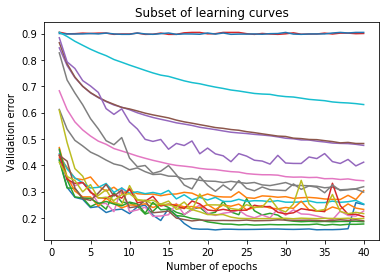

In [8]:
import numpy as np

n_subset=20
t_idx = np.arange(1, n_epochs+1)

[plt.plot(t_idx, lc) for lc in learning_curves[:n_subset]]
plt.title("Subset of learning curves")
plt.xlabel("Number of epochs")
plt.ylabel("Validation error")
plt.show()

## Basic Data Exploration

### Histogram and CDF over the final error rate

265
[ 0.15153689  0.1515819   0.15282866  0.15434343  0.15650082  0.15954709
  0.15959183  0.16055092  0.16080048  0.16156045  0.16244856  0.16430366
  0.16470223  0.16500051  0.16504065  0.16676737  0.16724419  0.16746314
  0.16788982  0.16836734  0.16912972  0.1696      0.17007007  0.17097436
  0.17197581  0.17218749  0.17309483  0.17469136  0.17477876  0.17589213
  0.1771176   0.17717566  0.18051375  0.18429064  0.18561671  0.18614719
  0.18654372  0.1888912   0.18908462  0.18939709  0.19002079  0.19011057
  0.19062407  0.19251503  0.19269777  0.19512195  0.19799197  0.20191532
  0.2025641   0.20337261  0.20503018  0.20661408  0.2067056   0.20721804
  0.20923359  0.20958447  0.21048843  0.21072796  0.21152115  0.21208654
  0.21271271  0.21322007  0.21383838  0.21459538  0.2149739   0.21512623
  0.21656115  0.2168614   0.2173462   0.21915322  0.22029654  0.22293893
  0.22635376  0.22674772  0.22709083  0.23027569  0.23098019  0.23246412
  0.23264447  0.23268473  0.23302277  0.2333535

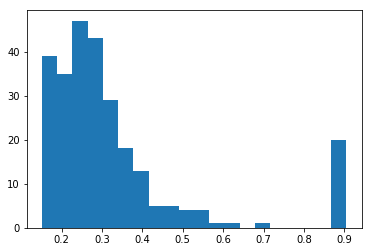

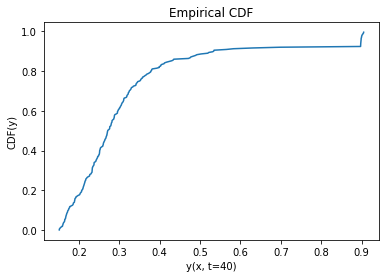

In [15]:
sorted = np.sort(learning_curves[:, -1])   # sorted list of final val error
print(len(sorted))
h = plt.hist(sorted, bins=20)
plt.show()

yvals = np.arange(len(sorted))/float(len(sorted))   # from 0 to 1 in 265 even steps
plt.plot(sorted, yvals)
plt.title("Empirical CDF")
plt.xlabel("y(x, t=40)")
plt.ylabel("CDF(y)")
plt.show()

### Histogram and CDF over all error rates

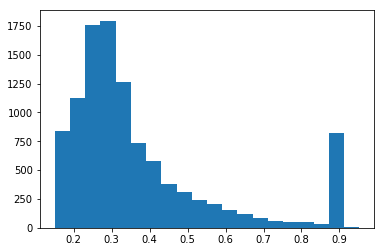

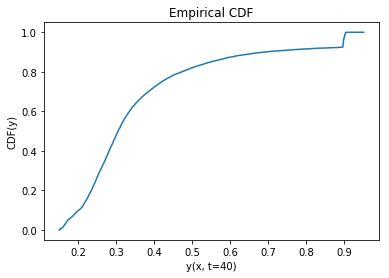

In [14]:
all_values = np.sort(learning_curves.flatten())

h = plt.hist(all_values, bins=20)
plt.show()

yvals = np.arange(all_values.shape[0])/all_values.shape[0]
plt.plot(all_values, yvals)
plt.title("Empirical CDF")
plt.xlabel("y(x, t=40)")
plt.ylabel("CDF(y)")
plt.show()